# ***Medical Cost Insurance Prediction***

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [45]:
df = pd.read_csv('insurance.csv')

In [46]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
df.shape

(1338, 7)

In [48]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [49]:
df.isna().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [50]:
df.duplicated().sum()

np.int64(1)

In [51]:
df.drop_duplicates(inplace=True)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [53]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# ***EDA***

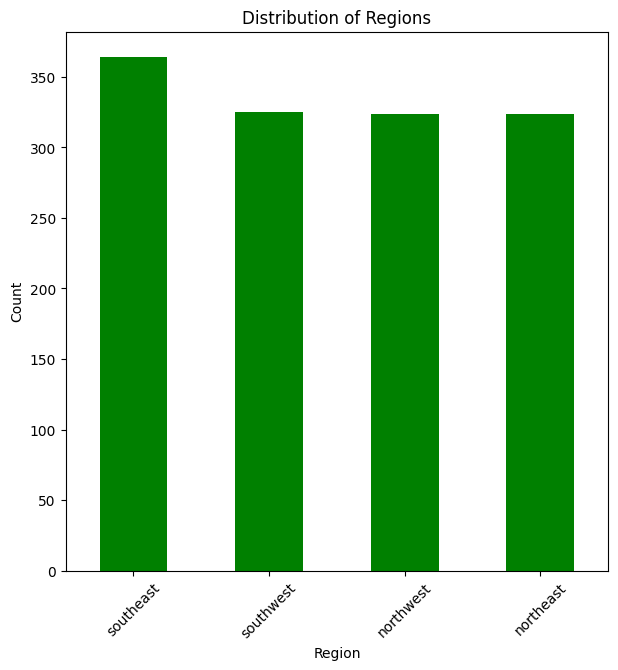

In [54]:
plt.figure(figsize=(7,7))
df['region'].value_counts().plot(kind='bar',color = 'green')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Distribution of Regions')
plt.show()

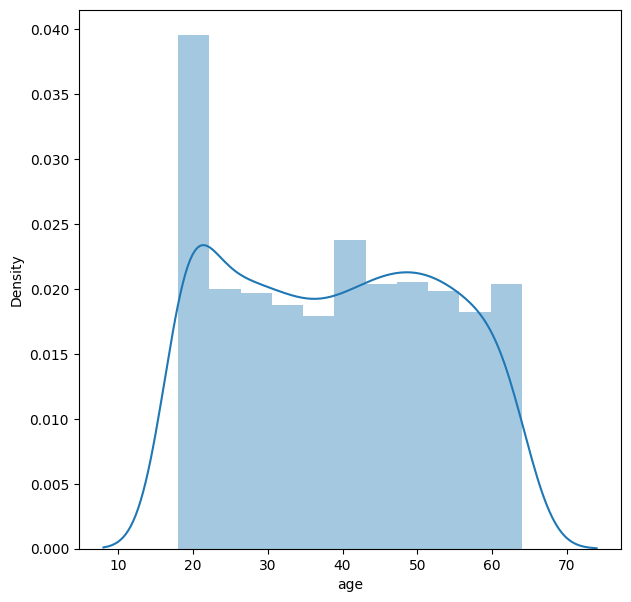

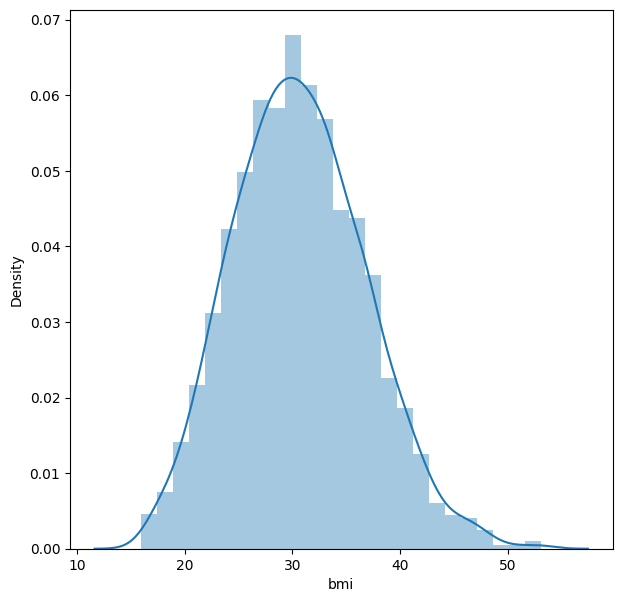

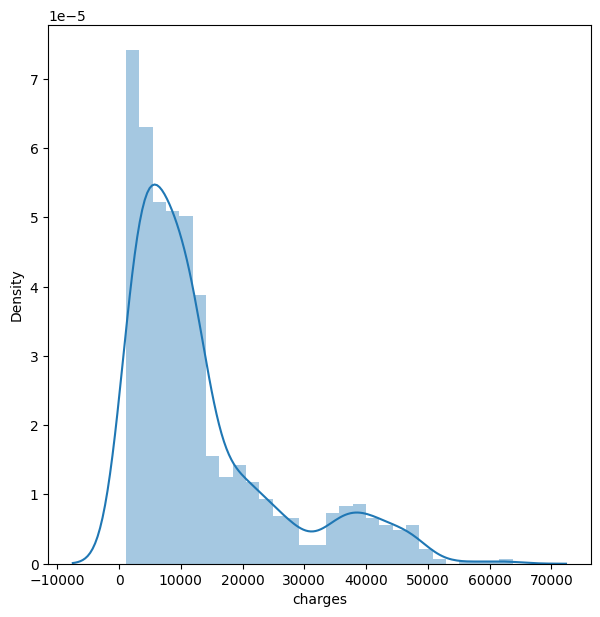

In [55]:
col = ['age','bmi','charges']
for i in col:
  plt.figure(figsize=(7,7))
  sns.distplot(df[i])
  plt.xlabel(i)
  plt.show()

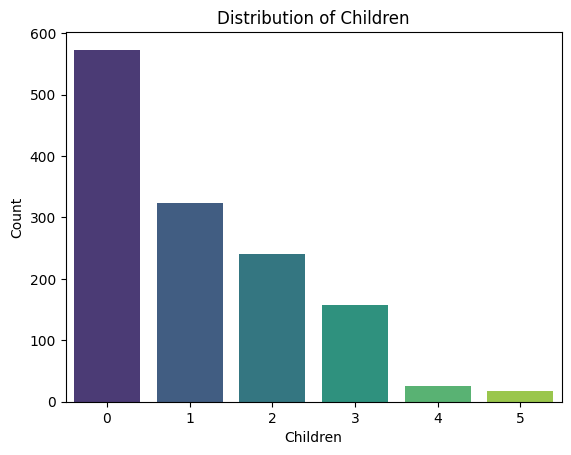

In [56]:
sns.countplot(x = 'children',data = df,palette='viridis')
plt.xlabel('Children')
plt.ylabel('Count')
plt.title('Distribution of Children')
plt.show()

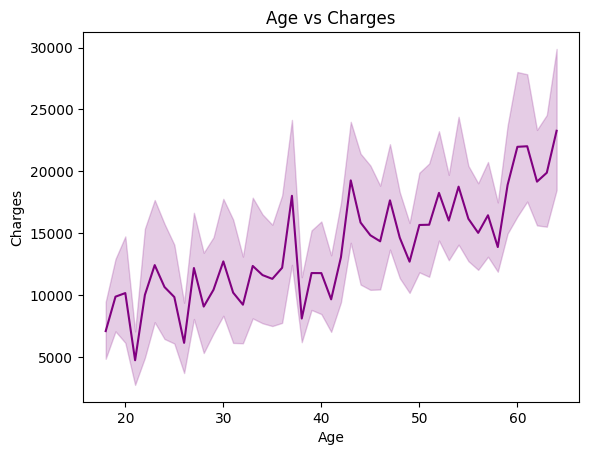

In [57]:
sns.lineplot(x = 'age',y = 'charges',data = df,color = 'purple')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.title('Age vs Charges')
plt.show()

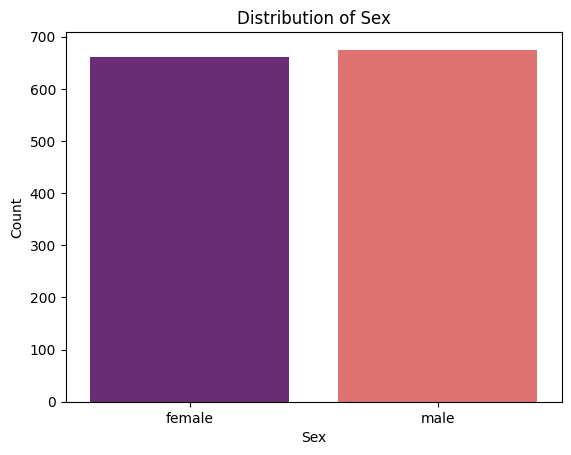

In [58]:
sns.countplot(x = 'sex',data = df,palette='magma')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.show()

In [59]:
df['smoker'] = df['smoker'].map({'no': 0,'yes' : 1})

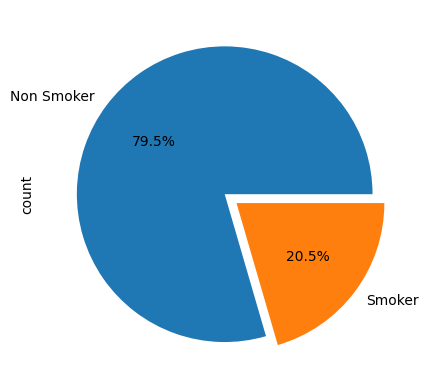

In [60]:
df['smoker'].value_counts().plot.pie(autopct='%1.1f%%',labels=['Non Smoker','Smoker'],explode = [0,0.1])
plt.show()

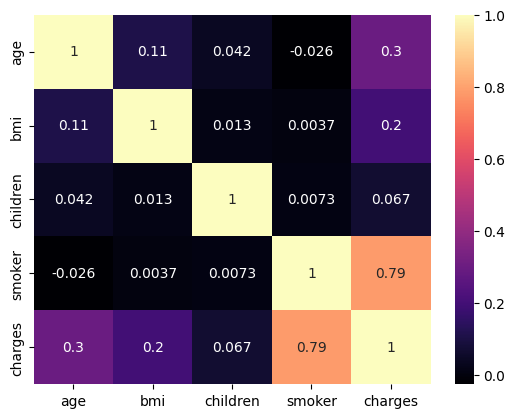

In [61]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap = 'magma')
plt.show()

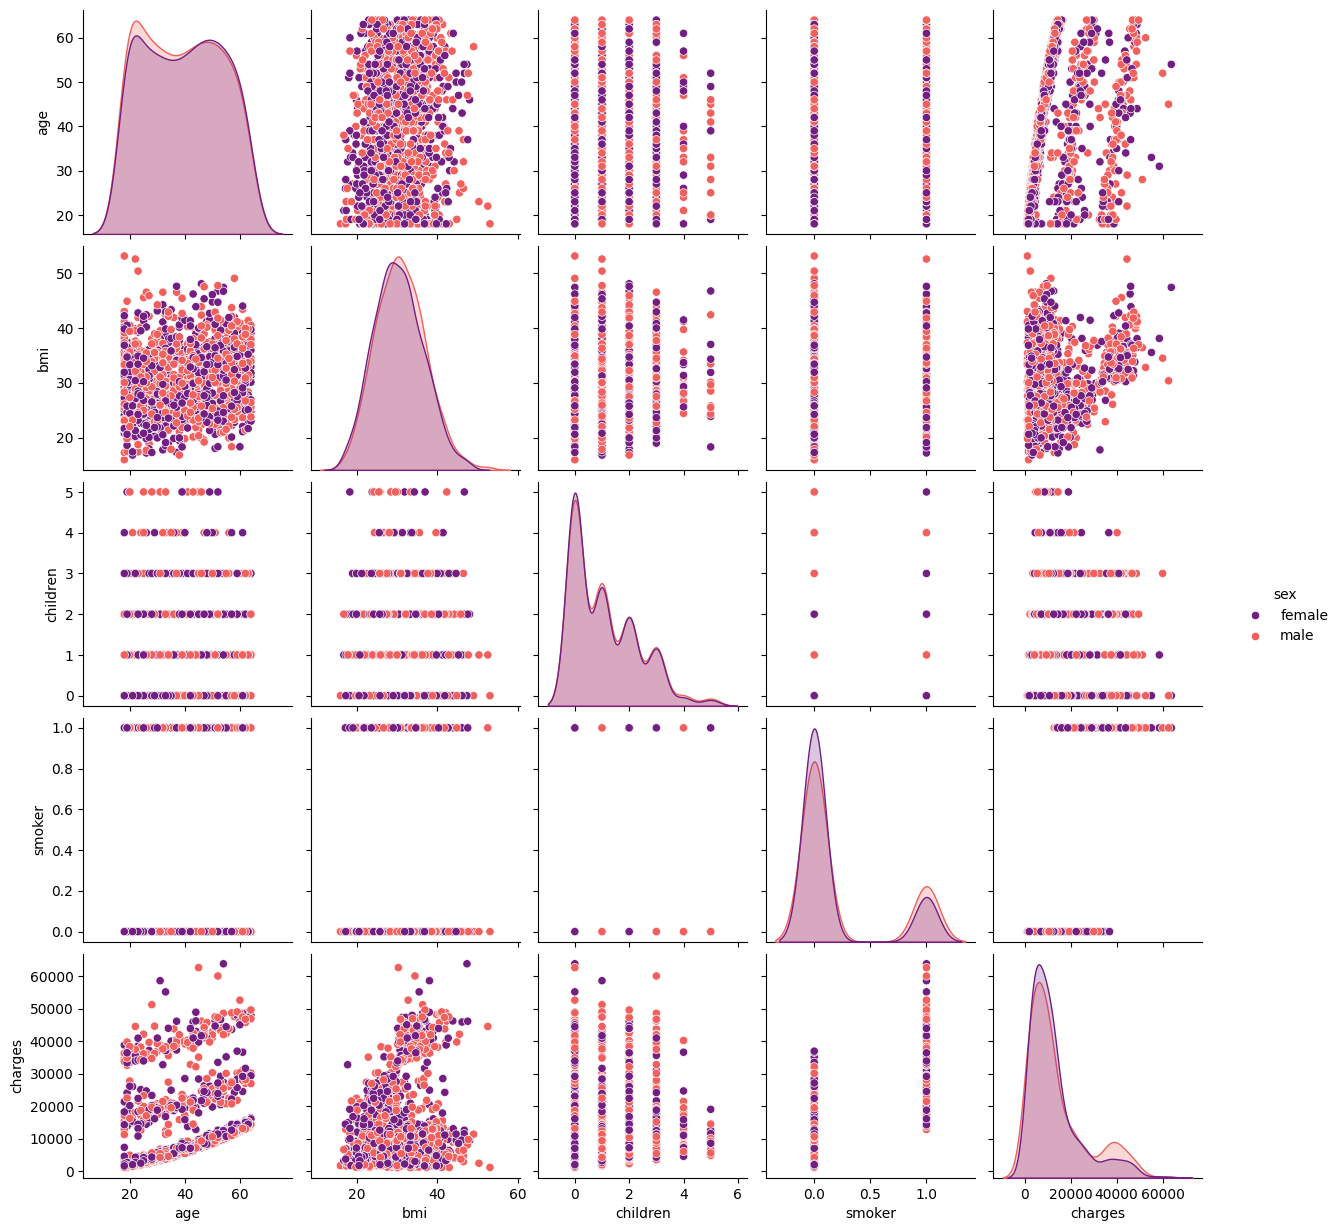

In [62]:
sns.pairplot(df,hue = 'sex',palette='magma')
plt.show()

In [63]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


# ***Preprocessing***

In [64]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler
ohe = OneHotEncoder(drop='first')
scaler = StandardScaler()

In [65]:
encoded = ohe.fit_transform(df[['sex','region']])
encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(['sex', 'region']))

In [66]:
df = df.join(encoded_df)

In [67]:
df.drop(['sex','region'],axis =1,inplace = True)

In [68]:
X = df.drop('charges',axis = 1)
y = np.log1p(df['charges'])

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
cols_to_scale = ['age', 'bmi', 'children']
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

# ***Model Building***

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

# Build model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1))  # No activation for regression

In [72]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 179,201 (700.00 KB)

 Trainable params: 179,201 (700.00 KB)

 Non-trainable params: 0 (0.00 B)

In [73]:
# Compile
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [74]:
history = model.fit(X_train, y_train, epochs=120, batch_size=32,
                    validation_data=(X_test,y_test))


Epoch 1/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - loss: 51.3146 - mae: 6.5205 - val_loss: nan - val_mae: nan
Epoch 2/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 8.0716 - mae: 2.2553 - val_loss: nan - val_mae: nan
Epoch 3/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.4672 - mae: 2.0798 - val_loss: nan - val_mae: nan
Epoch 4/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.2842 - mae: 1.8815 - val_loss: nan - val_mae: nan
Epoch 5/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 4.1101 - mae: 1.6213 - val_loss: nan - val_mae: nan
Epoch 6/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.4444 - mae: 1.4536 - val_loss: nan - val_mae: nan
Epoch 7/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.3122 - mae: 1.4592 - val_loss: nan - val_mae: nan
Epoch 8/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0330 - mae: 1.3938 - val_loss: nan - val_mae: nan
Epoch 9/120
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6153 - mae: 1.2905 - val_loss: nan - val_mae: nan

In [75]:
y_pred = model.predict(X_test).flatten()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [76]:
from sklearn.metrics import mean_squared_error
# Filter out NaN values from y_test and y_pred
valid_indices = ~np.isnan(y_pred)
y_test = y_test[valid_indices]
y_pred = y_pred[valid_indices]

# Ensure y_test_valid is a list for mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test.tolist(), y_pred))
print(f"RMSE: {rmse:.2f}")


nan_predictions_count = np.sum(np.isnan(y_pred))
print(f"Number of NaN predictions: {nan_predictions_count}")

RMSE: 0.39
Number of NaN predictions: 0


In [77]:
from sklearn.metrics import r2_score

print('R2 Score:',r2_score(y_test,y_pred))

R2 Score: 0.834846073924164


In [78]:
import joblib

joblib.dump(X.columns.tolist(), 'columns.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [79]:
model.save("prediction_ann_model.keras")

In [80]:
columns = joblib.load('columns.pkl')

# ***Prediction Function***

In [81]:
def predict_insurance_cost(user_input_dict):
  input_df = pd.DataFrame([user_input_dict])
  input_df['smoker'] = input_df['smoker'].map({'no': 0,'yes' : 1})
  encoded = ohe.transform(input_df[['sex', 'region']])
  encoded_df = pd.DataFrame(encoded.toarray(), columns=ohe.get_feature_names_out(['sex', 'region']))

  input_df = input_df.drop(['sex', 'region'], axis=1)
  input_df = input_df.join(encoded_df)
  input_df = input_df.reindex(columns=columns, fill_value=0)
  cols_to_scale = ['age', 'bmi', 'children']
  input_df[cols_to_scale] = scaler.transform(input_df[cols_to_scale])
  pred_log = model.predict(input_df)
  pred_actual = np.expm1(pred_log)

  print(f'Medical Insurance Cost Prediction : {round(float(pred_actual[0][0]),2)}')

# ***Prediction 1***

In [82]:
sample_input ={
        'age': 35,
        'sex': 'male',
        'bmi': 28.5,
        'children': 2,
        'smoker': 'yes',
        'region': 'southeast'
    }

predict_insurance_cost(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
Medical Insurance Cost Prediction : 22032.65


# ***Prediction 2***

In [83]:
sample_input = {
    'age': 23,
    'sex': 'female',
    'bmi': 33.2,
    'children': 0,
    'smoker': 'yes',
    'region': 'southeast'
}

predict_insurance_cost(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Medical Insurance Cost Prediction : 26481.88


# ***Prediction 3***

In [84]:
sample_input = {
    'age': 45,
    'sex': 'male',
    'bmi': 28.9,
    'children': 1,
    'smoker': 'yes',
    'region': 'southwest'
}

predict_insurance_cost(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Medical Insurance Cost Prediction : 23282.94


# ***Prediction 4***

In [85]:
sample_input = {
    'age': 19,
    'sex': 'male',
    'bmi': 22.5,
    'children': 0,
    'smoker': 'no',
    'region': 'southeast'
}

predict_insurance_cost(sample_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Medical Insurance Cost Prediction : 2116.78


# ***Prediction 5***

In [86]:
sample_input = {
    'age': 60,
    'sex': 'female',
    'bmi': 31.1,
    'children': 3,
    'smoker': 'no',
    'region': 'northeast'
}

predict_insurance_cost(sample_input)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Medical Insurance Cost Prediction : 13297.1
